# Robertson's Example
A simple three-species chemical kinetics system known as "Robertson's
example", as presented in:

H. H. Robertson, The solution of a set of reaction rate equations, in Numerical
Analysis: An Introduction, J. Walsh, ed., Academic Press, 1966, pp. 178-182.

In [2]:
# This is a simple system often used to study stiffness in systems of
# differential equations.  It doesn't leverage the power of rules-based modeling
# or pysb, but it's a useful small model for purposes of experimentation.
#
# A brief report addressing issues of stiffness encountered in numerical
# integration of Robertson's example can be found here:
# http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.53.8603&rep=rep1&type=pdf
#
# The chemical model is as follows:
#
#      Reaction        Rate
#   ------------------------
#       A -> B         0.04
#      2B -> B + C     3.0e7
#   B + C -> A + C     1.0e4
#
# The resultant system of differential equations is:
#
# y1' = -0.04 * y1 + 1.0e4 * y2 * y3
# y2' =  0.04 * y1 - 1.0e4 * y2 * y3 - 3.0e7 * y2^2
# y3' =                                3.0e7 * y2^2
#
# If you run this script directly, it will generate the equations and print them
# in a form very closely resembling that given above.  See also run_robertson.py
# which integrates the system and plots the trajectories.

In [3]:
from pysb import *

Model()

Monomer('A')
Monomer('B')
Monomer('C')

#       A -> B         0.04
Rule('A_to_B', A() >> B(), Parameter('k1', 0.04))
#      2B -> B + C     3.0e7
Rule('BB_to_BC', B() + B() >> B() + C(), Parameter('k2', 3.0e7))
#   B + C -> A + C     1.0e4
Rule('BC_to_AC', B() + C() >> A() + C(), Parameter('k3', 1.0e4))

# The system is known to be stiff for initial values A=1, B=0, C=0
Initial(A(), Parameter('A_0', 1.0))
Initial(B(), Parameter('B_0', 0.0))
Initial(C(), Parameter('C_0', 0.0))

# Observe total amount of each monomer
Observable('A_total', A())
Observable('B_total', B())
Observable('C_total', C())

Observable('C_total', C())

## Simulation

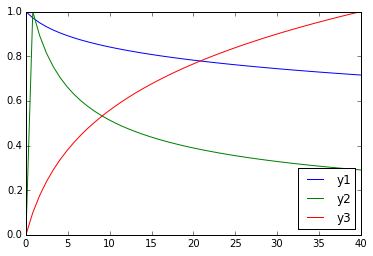

In [5]:
%matplotlib inline
from pylab import *
from pysb.integrate import odesolve

# We will integrate from t=0 to t=40
t = linspace(0, 40)
# Simulate the model
y = odesolve(model, t, rtol=1e-4, atol=[1e-8, 1e-14, 1e-6])
# Gather the observables of interest into a matrix
yobs = array([y[obs] for obs in ('A_total', 'B_total', 'C_total')]).T
# Plot normalized trajectories
plot(t, yobs / yobs.max(0))
legend(['y1', 'y2', 'y3'], loc='lower right')
show()